LOFAR（窄带谱/LOFARgram），本质上就是 长窗 STFT 的功率谱（长窗=高频率分辨率、时间分辨率较低），再转成 dB

In [3]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, gaussian_filter1d

In [4]:
def lofar_spectrogram(waveform, samplerate, n_fft, hop_length, window="hann"):
    """
    计算 LOFAR（窄带 STFT 功率谱，dB）。
    返回：times[s], freqs[Hz], STFT_db_filter[dB, shape=(freq_bins, time_frames)]
    """
    STFT_pow = np.abs(librosa.stft(waveform, n_fft=n_fft, hop_length=hop_length, window=window, center=True))**2

    STFT_db = librosa.power_to_db(STFT_pow, ref=np.max)

    freqs = librosa.fft_frequencies(sr=samplerate, n_fft=n_fft)

    times = librosa.frames_to_time(np.arange(STFT_db.shape[1]), sr=samplerate, hop_length=hop_length)

    return times, freqs, STFT_db


In [5]:
def plot_lofar_spectrogram(times, freqs, STFT_db, title="LOFAR (narrowband spectrogram)"):
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(STFT_db, x_coords=times, y_coords=freqs, x_axis='time', y_axis='hz')
    plt.title(title)
    plt.colorbar(format="%+0.1f dB")
    plt.tight_layout()
    plt.show()

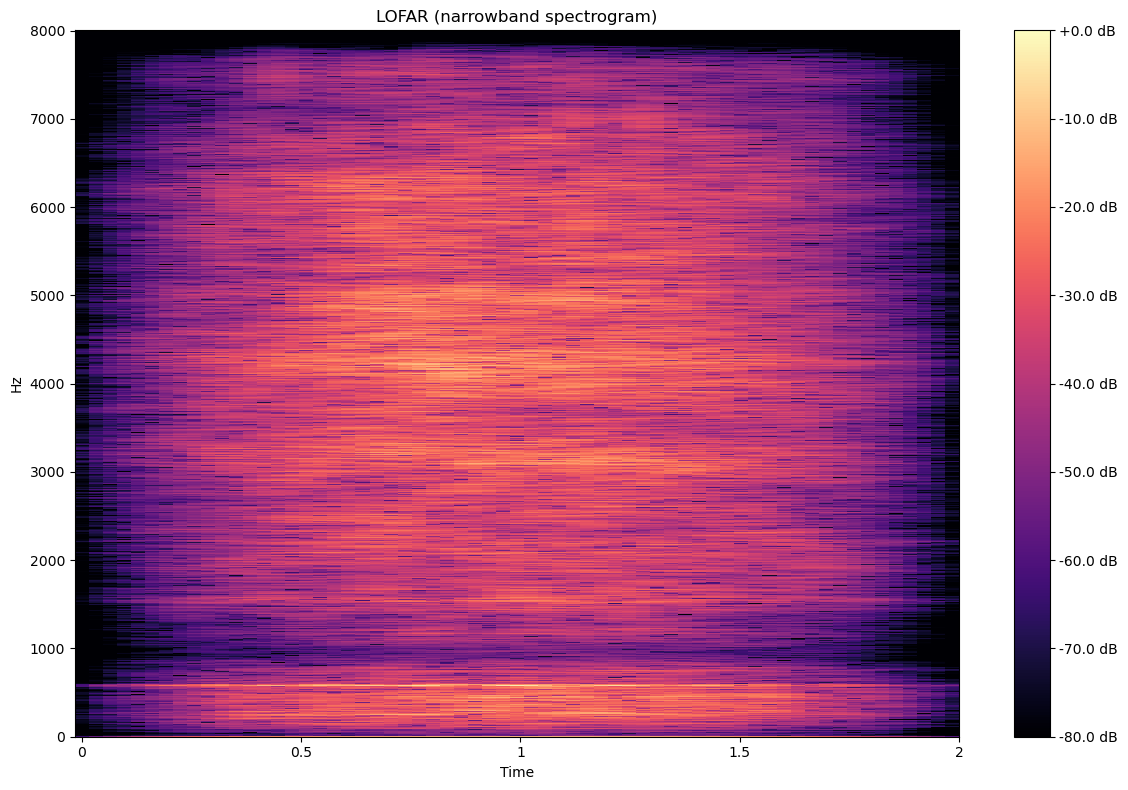

In [6]:
audio_file = r'E:\数据集\ShipEar\data_preprocessing\4_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

waveform, sample_rate = librosa.load(audio_file, sr=16000)

frame_length = 4096
hop_length = 512

times, freqs, STFT_db = lofar_spectrogram(waveform, sample_rate, frame_length, hop_length)
plot_lofar_spectrogram(times, freqs, STFT_db)